### Goal : Decompose time-series data into three terms: trend, period & random


Resources/Bibliograpy:
- [Basic Fourier transform](http://www.phys.nsu.ru/cherk/fft.pdf)
- [Fourier Decomposition Analysis for non-linear & non-stationary data](https://royalsocietypublishing.org/doi/10.1098/rspa.2016.0871)
- [Empirical Mode Decomposition (EMD)]()
- [Ensemble Empirical Mode Decomposition (EEMD)](https://www.worldscientific.com/doi/abs/10.1142/S1793536909000047)
- [EEMD + LSTM](https://link.springer.com/article/10.1007/s11269-019-02345-1)

In [2]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Replace sample_func_dir by the name of directory in src/ and replace sample_func_file the
# file name in src/sample_func_dir
from src.data.import_data import import_df_from_zip
from src.data.make_dataset import *

In [3]:
# Load data 
csv_index   = 1
synth_name  = "basic"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"
df          = import_df_from_zip(path_to_zip, csv_index, verbose=True)

time for importing dataframe: 62.58 seconds


In [4]:
# Preprocess data
df = downsample_dataframe(df, night_method='basic', clip_method='universal')

(213267, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 00:00:00-05:00 to 2019-12-31 00:00:00-05:00
Freq: D
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Power                    1826 non-null   float64
 1   POA                      1826 non-null   float64
 2   Tamb                     1826 non-null   float64
 3   Wind                     1826 non-null   float64
 4   Degradation_rate_per_yr  1826 non-null   float64
 5   soiling                  1826 non-null   float64
 6   year                     1826 non-null   float64
 7   month                    1826 non-null   float64
 8   day                      1826 non-null   float64
 9   hour                     1826 non-null   float64
 10  minute_of_hour           1826 non-null   float64
 11  minute_of_day            1826 non-null   float64
dtypes: float64(12)
memory usage: 185.5 KB


In [5]:
df.head()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling,year,month,day,hour,minute_of_hour,minute_of_day
2015-01-01 00:00:00-05:00,376.821429,169.214286,7.361111,0.0,-0.01436,1.0,2015.0,1.0,1.0,12.150794,30.373016,759.420635
2015-01-02 00:00:00-05:00,381.860558,171.207171,7.328287,0.0,-0.01436,1.0,2015.0,1.0,2.0,12.171315,30.282869,760.561753
2015-01-03 00:00:00-05:00,384.126984,172.051587,7.291667,0.0,-0.01436,1.0,2015.0,1.0,3.0,12.190476,30.166667,761.595238
2015-01-04 00:00:00-05:00,386.707510,172.956522,7.251383,0.0,-0.01436,1.0,2015.0,1.0,4.0,12.209486,30.055336,762.624506
2015-01-05 00:00:00-05:00,389.547244,173.980315,7.217323,0.0,-0.01436,1.0,2015.0,1.0,5.0,12.228346,29.948819,763.649606


In [4]:
from scipy import fftpack
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
L = len(df["Power"].to_numpy()) # length of signal
T = 1 # [day] # sampling period
Fs = 1/T # [1/day] # sampling frequency
freq = Fs*np.arange(L/2)/L

df_fft = fftpack.fft(df["Power"].to_numpy()) # Fourier transform 
# division por L -> Parseval's theorem!! - chequar esto es asi en MATLAB, en python?

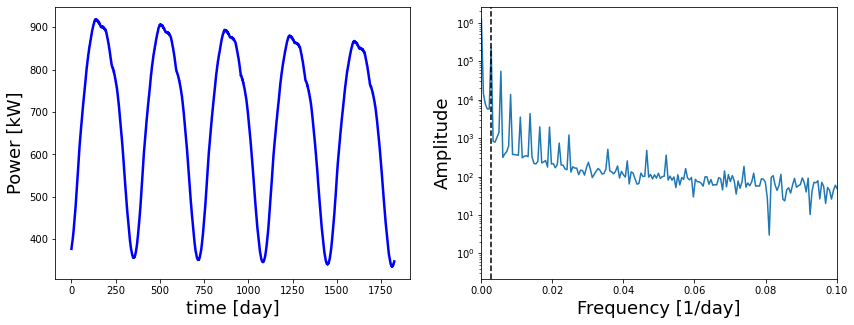

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(df["Power"].values, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [day]", fontsize=18)

ax[1].plot(freq, np.abs(df_fft[0:int(L/2)])) # plot freq domain
ax[1].axvline(1/365, ls="--", color="k") # this is the year frequency

ax[1].set_ylabel("Amplitude", fontsize=18)
ax[1].set_xlabel("Frequency [1/day]", fontsize=18)
ax[1].set_xlim([0, 0.1])
#ax[1].set_xscale("log")
ax[1].set_yscale("log")

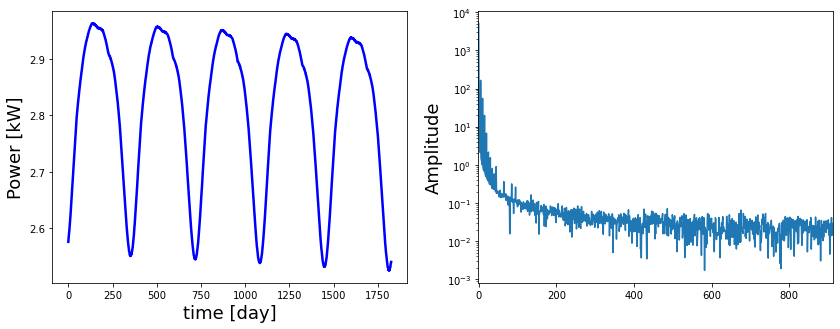

In [12]:
power     = np.log10(df["Power"].to_numpy())
power_fft = fftpack.fft(power)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(power, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [day]", fontsize=18)

ax[1].plot(np.abs(power_fft)) # plot freq domain

ax[1].set_ylabel("Amplitude", fontsize=18)
#ax[1].set_xlabel("Frequency", fontsize=18)
ax[1].set_xlim([-1, 914])
ax[1].set_yscale("log")

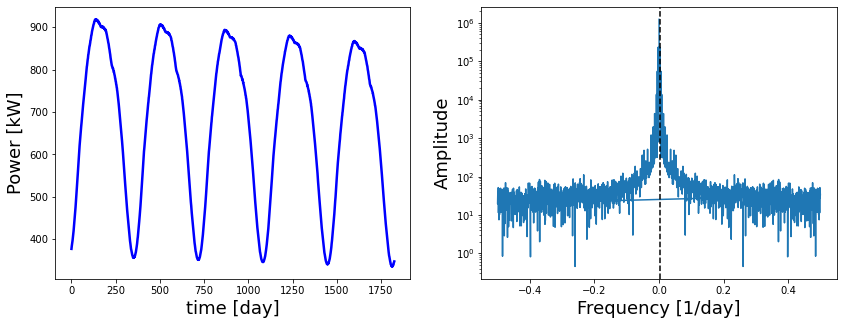

In [50]:
power_fft = fftpack.fft(df["Power"].to_numpy())
sample_freq = fftpack.fftfreq(df["Power"].to_numpy().size, d=1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(df["Power"].values, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [day]", fontsize=18)

ax[1].plot(sample_freq, np.abs(power_fft)) # plot freq domain
ax[1].axvline(1/365, ls="--", color="k") # this is the year frequency

ax[1].set_ylabel("Amplitude", fontsize=18)
ax[1].set_xlabel("Frequency [1/day]", fontsize=18)
#ax[1].set_xlim([0, 0.1])
#ax[1].set_xscale("log")
ax[1].set_yscale("log")

/home/maria/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'time [day]')

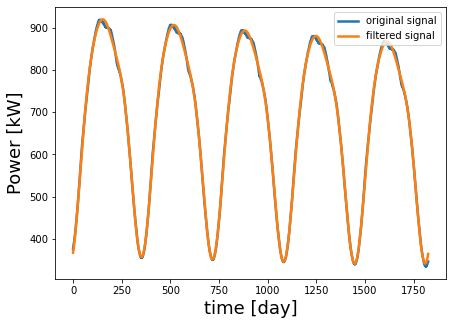

In [56]:
# remove all the hight frequencies
high_freq_fft = power_fft.copy()
high_freq_fft[np.abs(sample_freq) > 0.01] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(df["Power"].to_numpy(), label="original signal", lw=2.5)
ax.plot(filtered_sig, label="filtered signal", lw=2.5)
ax.legend(loc="best")
ax.set_ylabel("Power [kW]", fontsize=18)
ax.set_xlabel("time [day]", fontsize=18)

In [1]:
from PyEMD import EMD

In [10]:
df.head()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling,year,month,day,hour,minute_of_hour,minute_of_day
2015-01-01 00:00:00-05:00,376.821429,169.214286,7.361111,0.0,-0.01436,1.0,2015.0,1.0,1.0,12.150794,30.373016,759.420635
2015-01-02 00:00:00-05:00,381.860558,171.207171,7.328287,0.0,-0.01436,1.0,2015.0,1.0,2.0,12.171315,30.282869,760.561753
2015-01-03 00:00:00-05:00,384.126984,172.051587,7.291667,0.0,-0.01436,1.0,2015.0,1.0,3.0,12.190476,30.166667,761.595238
2015-01-04 00:00:00-05:00,386.707510,172.956522,7.251383,0.0,-0.01436,1.0,2015.0,1.0,4.0,12.209486,30.055336,762.624506
2015-01-05 00:00:00-05:00,389.547244,173.980315,7.217323,0.0,-0.01436,1.0,2015.0,1.0,5.0,12.228346,29.948819,763.649606


In [13]:
help(emd)

Help on built-in function emd in module pyemd.emd:

emd(...)
    Return the EMD between two histograms using the given distance matrix.
    
    The Earth Mover's Distance is the minimal cost of turning one histogram into
    another by moving around the “dirt” in the bins, where the cost of moving
    dirt from one bin to another is given by the amount of dirt times the
    “ground distance” between the bins.
    
    Arguments:
        first_histogram (np.ndarray): A 1D array of type np.float64 of length N.
        second_histogram (np.ndarray): A 1D array of np.float64 of length N.
        distance_matrix (np.ndarray): A 2D array of np.float64, of size at least
            N × N. This defines the underlying metric, or ground distance, by
            giving the pairwise distances between the histogram bins. It must
            represent a metric; there is no warning if it doesn't.
    
    Keyword Arguments:
        extra_mass_penalty (float): The penalty for extra mass. If you want 

In [8]:
emd = EMD()
# intrinsic mode functions
imf = emd(df.Power.to_numpy(), df.day.to_numpy())
print (imf.shape)

(6, 1826)
